In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### 2. Implement thuật toán PCA bằng numpy

In [32]:
data = np.random.rand(50,3)

In [38]:
def show(data):
    plt.rcParams["figure.figsize"] = [10.0, 5.0]
    plt.rcParams["figure.autolayout"] = True
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    z, x, y = data.T[0],data.T[1],data.T[2]
    ax.scatter(x, y, z, c=z, alpha=1)
    plt.show()

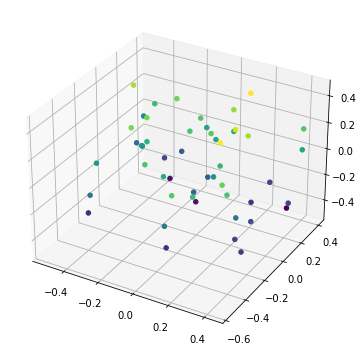

In [39]:
show(data)

In [34]:
mean = data.mean(axis=0)
mean

array([0.45143853, 0.45240055, 0.40908308])

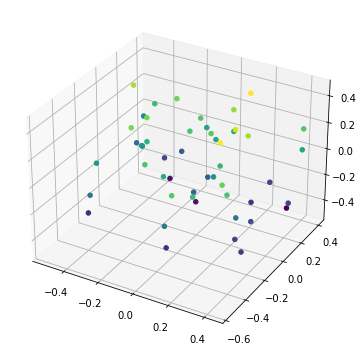

In [35]:
data = data.mean(axis=0)-data
show(data)

In [36]:
cov = np.cov(data.T) / data.shape[0] 
eigenvalue, eigenvector = np.linalg.eigh(cov)

i = eigenvalue.argsort()[::-1] # Sort eigenvalue and set index
eigenvalue = eigenvalue[i] 
eigenvector = eigenvector[:,i]
     
z = data.dot(eigenvector[:, :2])

In [3]:
def projected(X):
   
    plt.plot(X[:,0], X[:,1], 'go', markersize = 4, alpha = .8)
    plt.axvline(x=0, ymin=0, ymax=1, lw=1.5, label='boudary')
    plt.axhline(y=0, xmin=0, xmax=1, lw=1.5)
    plt.show()

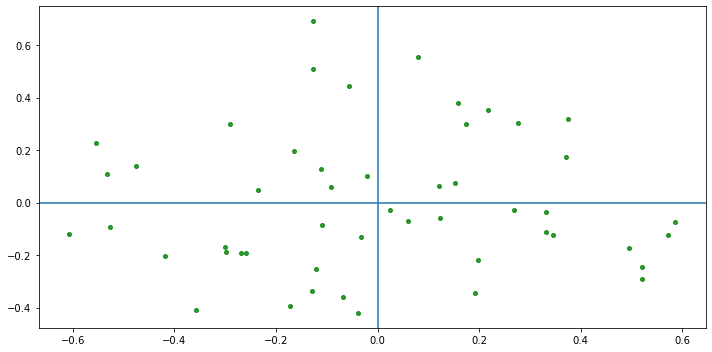

In [40]:
projected(z.real)

### 3. Dùng thuật toán ở bài 2, giảm dữ liệu iris về 2 chiều

#### a. Visualize dữ liệu giảm chiều với scatter plot và label của hoa

In [4]:
df = pd.read_csv('iris.data', names=['sepal length','sepal width','petal length','petal width','target'])
df

,sepal length,sepal width,petal length,petal width,target
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [5]:
def PCA(X , num_components):
     
    #Step-1
    X_meaned = np.mean(X , axis = 0) - X
     
    #Step-2
    cov_mat = np.cov(X_meaned , rowvar = False)
     
    #Step-3
    eigen_values , eigen_vectors = np.linalg.eigh(cov_mat)
     
    #Step-4
    sorted_index = np.argsort(eigen_values)[::-1]
    sorted_eigenvalue = eigen_values[sorted_index]
    sorted_eigenvectors = eigen_vectors[:,sorted_index]
     
    #Step-5
    eigenvector_subset = sorted_eigenvectors[:,0:num_components]
     
    #Step-6
    X_reduced = np.dot(eigenvector_subset.transpose() , X_meaned.transpose() ).transpose()
     
    return X_reduced

In [6]:
from sklearn.preprocessing import StandardScaler

features = ['sepal length', 'sepal width', 'petal length', 'petal width']
# Separate out the features
x = df.loc[:, features].values
# Separate out the target
target = df.loc[:,['target']].values
# Standardize the features
x = StandardScaler().fit_transform(x)

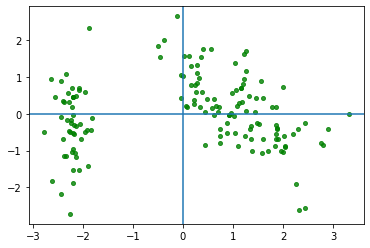

In [7]:
projected(PCA(x,2))

#### b. Vẽ explained variance graph với các chiều của dữ liệu

In [8]:
covariance_matrix = np.cov(x.T)
covariance_matrix

array([[ 1.00671141, -0.11010327,  0.87760486,  0.82344326],
       [-0.11010327,  1.00671141, -0.42333835, -0.358937  ],
       [ 0.87760486, -0.42333835,  1.00671141,  0.96921855],
       [ 0.82344326, -0.358937  ,  0.96921855,  1.00671141]])

In [9]:
eigen_values, eigen_vectors = np.linalg.eig(covariance_matrix)

print("Eigenvector: \n",eigen_vectors,"\n")
print("Eigenvalues: \n", eigen_values, "\n")

Eigenvector: 
 [[ 0.52237162 -0.37231836 -0.72101681  0.26199559]
 [-0.26335492 -0.92555649  0.24203288 -0.12413481]
 [ 0.58125401 -0.02109478  0.14089226 -0.80115427]
 [ 0.56561105 -0.06541577  0.6338014   0.52354627]] 

Eigenvalues: 
 [2.93035378 0.92740362 0.14834223 0.02074601] 



In [10]:
sum_explained_variance = sum(eigen_values)
sum_explained_variance

4.02684563758389

In [11]:
explained_variance = []
for eigen_value in eigen_values:
    explained_variance.append(eigen_value/sum_explained_variance * 100)

print(explained_variance)

sum_explained_variance = np.cumsum(explained_variance)
for i in range(len(sum_explained_variance)):
    print(f'PC {i} will take {sum_explained_variance[i]}%')

[72.77045209380131, 23.030523267680664, 3.6838319576273926, 0.515192680890629]
PC 0 will take 72.77045209380131%
PC 1 will take 95.80097536148197%
PC 2 will take 99.48480731910936%
PC 3 will take 100.0%


In [12]:
#pip install plotly

In [26]:
#%matplotlib inline
import plotly.express as px

fig = px.line(
    y = sum_explained_variance,
    x = ['PC 1','PC 2', 'PC 3', 'PC 4'],
    title='Explained variance vs Number of components',
    labels=dict(x="Principle Component", y="Sum Explained Variance")
)
fig.show()

### 4. Thử dùng bài 3 với thuật toán PCA trong sklearn, so sánh kết quả

In [22]:
from sklearn.decomposition import PCA

features = ['sepal length', 'sepal width', 'petal length', 'petal width']
x = df.loc[:, features].values
y = df.loc[:,['target']].values
x = StandardScaler().fit_transform(x)

In [23]:
pca = PCA(n_components=2)
principal_Components = pca.fit_transform(x)
principal_Df = pd.DataFrame(data = principal_Components, columns = ['principal component 1', 'principal component 2'])
principal_Df.head()

,principal component 1,principal component 2
0,-2.264542,0.505704
1,-2.086426,-0.655405
2,-2.367950,-0.318477
3,-2.304197,-0.575368
4,-2.388777,0.674767


In [24]:
final_Df = pd.concat([principal_Df, df[['target']]], axis = 1)

<AxesSubplot:xlabel='principal component 1', ylabel='principal component 2'>

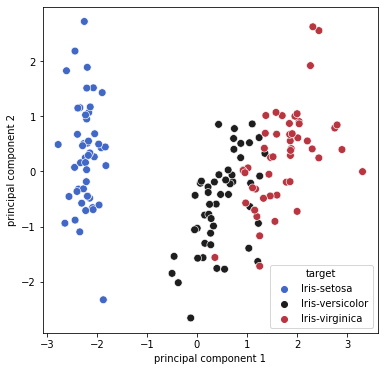

In [25]:
plt.figure(figsize = (6,6))
sns.scatterplot(data = finalDf, 
               x = 'principal component 1',y = 'principal component 2' , hue = 'target' , s = 60 , palette= 'icefire')